<a href="https://colab.research.google.com/github/kharerahul002/Forecasting-Models/blob/master/Tree_LR_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
# Explore time series data
quandl.ApiConfig.api_key = 'knewsUunFYUMpN7y7xKn'
df = quandl.get('BSE/BOM500325') #reliance
df

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1991-01-02,115.00,115.00,105.00,107.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,-7.50
1991-01-03,107.50,107.50,95.00,97.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,12.50,-10.00
1991-01-07,105.00,107.50,97.50,105.00,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,0.00
1991-01-09,105.00,105.00,101.25,102.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,3.75,-2.50
1991-01-11,102.50,110.00,100.00,108.75,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-11,1582.00,1614.85,1572.00,1576.75,1592.81,1066351.0,37832.0,1.698496e+09,236991.0,22.22,42.85,-5.25
2020-05-12,1578.00,1578.00,1455.00,1480.25,1539.20,2865647.0,58351.0,4.410807e+09,1600772.0,55.86,123.00,-97.75
2020-05-13,1534.75,1534.75,1454.00,1496.40,1479.47,1489557.0,51128.0,2.203760e+09,138373.0,9.29,80.75,-38.35


In [0]:
df = df[['Open']]
df

,Open
Date,
1991-01-02,115.00
1991-01-03,107.50
1991-01-07,105.00
1991-01-09,105.00
1991-01-11,102.50
...,...
2020-05-11,1582.00
2020-05-12,1578.00
2020-05-13,1534.75


In [0]:
#variable for predicting n days out into future
forecast_out = 1000
#create col (dependent variable) shifted n units up
df['Prediction'] = df[['Open']].shift(-forecast_out)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Open,Prediction
Date,,
1991-01-02,115.0,265.5
1991-01-03,107.5,268.0
1991-01-07,105.0,269.5
1991-01-09,105.0,273.5
1991-01-11,102.5,271.5


In [0]:
df.tail()

,Open,Prediction
Date,,
2020-05-11,1582.00,NaN
2020-05-12,1578.00,NaN
2020-05-13,1534.75,NaN
2020-05-14,1472.00,NaN
2020-05-15,1445.70,NaN


In [0]:
#create independent variable X and convert to numpy array
X = np.array(df.drop(['Prediction'],1))

#remove last n rows
X = X[:-forecast_out]
X

array([[ 115.  ],
       [ 107.5 ],
       [ 105.  ],
       ...,
       [1065.45],
       [1068.2 ],
       [1044.9 ]])

In [0]:
#create dependent variable Y and convert to numpy array(values including NaN)
y = np.array(df['Prediction'])

#get all of the y values except the last n rows
y = y[:-forecast_out]
y

array([ 265.5 ,  268.  ,  269.5 , ..., 1534.75, 1472.  , 1445.7 ])

In [0]:
#split data set into 80% and 20%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
#create and train the support vector machin(regressor)
svr_rbf = SVR(kernel= 'rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train) 

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
#testing model : score returns the coefficient of determination R^2 of the prediction
#best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
svm_confidence

0.577441041403333

In [0]:
#create and train linear regression model
lr = LinearRegression()

#train model
lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#testing model : score returns the coefficient of determination R^2 of the prediction
#best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
lr_confidence

0.0657703562035099

In [0]:
#create and train decision tree regression model
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [0]:
#testing model : score returns the coefficient of determination R^2 of the prediction
#best possible score is 1.0
tree_confidence = tree.score(x_test, y_test)
tree_confidence

0.4745928620593669

In [0]:
#set x_forecast equal to the 30 rows of the original data set from Open 
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast

array([[1041.  ],
       [1042.7 ],
       [1017.  ],
       [1019.9 ],
       [1019.7 ],
       [ 995.7 ],
       [ 981.4 ],
       [ 989.8 ],
       [ 976.  ],
       [ 982.25],
       [ 975.  ],
       [ 975.  ],
       [ 982.  ],
       [ 973.  ],
       [ 977.  ],
       [ 988.  ],
       [ 978.25],
       [ 980.  ],
       [ 967.  ],
       [ 971.15],
       [ 951.15],
       [ 938.4 ],
       [ 930.9 ],
       [ 949.2 ],
       [ 950.55],
       [ 951.5 ],
       [ 975.  ],
       [ 968.9 ],
       [ 958.8 ],
       [ 956.1 ],
       [ 957.5 ],
       [ 959.  ],
       [ 956.  ],
       [ 957.  ],
       [ 958.05],
       [ 973.  ],
       [ 970.  ],
       [ 982.  ],
       [ 977.5 ],
       [ 981.9 ],
       [ 977.  ],
       [ 965.  ],
       [ 995.  ],
       [ 986.95],
       [ 980.  ],
       [ 966.  ],
       [ 949.85],
       [ 957.5 ],
       [ 961.  ],
       [ 971.  ],
       [ 973.5 ],
       [ 978.  ],
       [ 989.95],
       [ 993.45],
       [ 988.  ],
       [ 9

In [0]:
#print decision tree regression model prediction of next n days
tree_prediction = tree.predict(x_forecast)
tree_prediction

array([ 884.65      , 1208.1       ,  941.33333333,  948.        ,
        948.        , 1244.45      , 1181.525     , 1178.45714286,
       1168.975     , 1114.7       ,  984.6125    ,  984.6125    ,
       1092.66666667, 1064.7       ,  869.5       ,  990.        ,
        915.15      ,  813.875     , 1257.98333333,  860.        ,
       1217.55      , 1103.9       , 1020.7       , 1106.        ,
        879.3       , 1390.        ,  984.6125    , 1089.2       ,
        900.        , 1344.36666667,  923.55      ,  900.        ,
       1344.36666667, 1060.775     , 1465.25      , 1064.7       ,
       1015.49      , 1092.66666667, 1555.        , 1092.66666667,
        869.5       ,  882.25      , 1188.63333333,  929.5       ,
        813.875     ,  979.        , 1041.2       ,  923.55      ,
       1017.125     ,  860.        , 1570.9       ,  932.5       ,
       1178.45714286, 1547.        ,  990.        ,  990.        ,
        939.        , 1508.        ,  950.8125    , 1317.35   

In [0]:
#print linear regression model prediction of next n days
lr_prediction = lr.predict(x_forecast)
lr_prediction

array([ 920.17587496,  920.5887139 ,  914.34756049,  915.05181515,
        915.00324587,  909.1749314 ,  905.70222736,  907.74213742,
        904.3908566 ,  905.90864683,  904.14801017,  904.14801017,
        905.84793522,  903.66231729,  904.63370304,  907.30501384,
        904.93726108,  905.36224235,  902.20523868,  903.21305139,
        898.35612266,  895.2598306 ,  893.43848233,  897.88257211,
        898.2104148 ,  898.44111891,  904.14801017,  902.6666469 ,
        900.2138979 ,  899.55821252,  899.89819753,  900.26246719,
        899.53392788,  899.77677431,  900.03176307,  903.66231729,
        902.93377798,  905.84793522,  904.75512626,  905.82365058,
        904.63370304,  901.7195458 ,  909.00493889,  907.05002508,
        905.36224235,  901.96239224,  898.04042229,  899.89819753,
        900.74816006,  903.17662442,  903.78374051,  904.87654947,
        907.77856439,  908.62852691,  907.30501384,  907.31715616,
        908.3978228 ,  910.94771038,  912.16194256,  912.64763

In [0]:
#print support vector regressor model prediction of next n days
svm_prediction = svr_rbf.predict(x_forecast)
svm_prediction

array([ 982.62942367,  927.25622432, 1056.48353998,  952.33214985,
        969.86231212,  981.54758145, 1113.11374605, 1106.18683049,
       1080.09986892, 1202.51511474, 1059.90006519, 1059.90006519,
       1179.89986628, 1064.5995782 , 1092.39591448, 1069.45054359,
       1026.08713763,  975.84736386, 1020.09944713,  971.55981145,
       1272.22396519, 1104.00032275, 1026.22755313, 1081.28388289,
       1248.77635163, 1259.89127188, 1059.90006519, 1064.8195953 ,
        924.57558491, 1068.31098404, 1033.1256145 ,  913.64084313,
       1063.81189761, 1065.75006879,  984.46552242, 1064.5995782 ,
        998.69974587, 1179.89986628, 1076.16762817, 1169.79389167,
       1092.39591448, 1029.15980662,  999.93380578, 1007.22575147,
        975.84736386,  991.98508729, 1168.45854864, 1033.1256145 ,
        961.16045863,  969.16329409, 1072.8221061 , 1044.83844066,
       1095.9659799 ,  978.20825146, 1069.45054359, 1073.24850348,
        938.89982397, 1132.50127769, 1055.04986501, 1204.87718

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


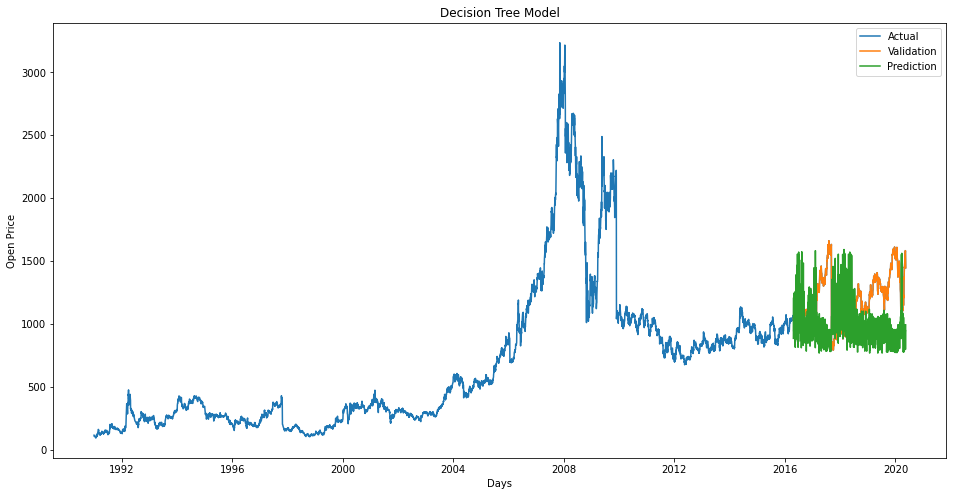

In [0]:
#visualize data 
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.plot(df['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Actual', 'Validation', 'Prediction'])
plt.show()

In [0]:
from statsmodels.tools.eval_measures import rmse
error=rmse(valid['Predictions'], valid['Open'])
error

360.24025808304316

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


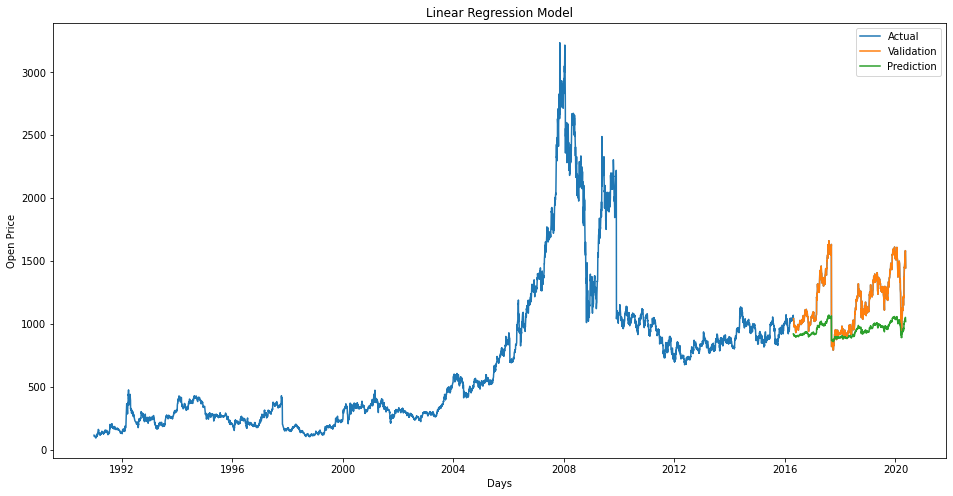

In [0]:
#visualize data 
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.plot(df['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Actual', 'Validation', 'Prediction'])
plt.show()

In [0]:
from statsmodels.tools.eval_measures import rmse
error=rmse(valid['Predictions'], valid['Open'])
error

271.0574167011593

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


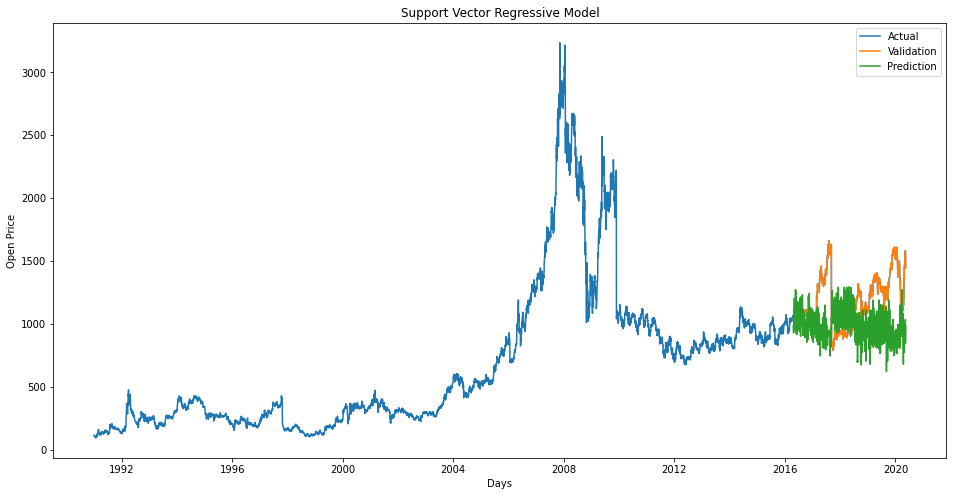

In [0]:
#visualize data 
predictions = svm_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Support Vector Regressive Model')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.plot(df['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Actual', 'Validation', 'Prediction'])
plt.show()

In [0]:
from statsmodels.tools.eval_measures import rmse
error=rmse(valid['Open'], predictions)
error

333.60346536350016

In [0]:
valid.tail()

,Open,Prediction,Predictions
Date,,,
2020-05-11,1582.00,NaN,1034.546686
2020-05-12,1578.00,NaN,846.604538
2020-05-13,1534.75,NaN,846.673863
2020-05-14,1472.00,NaN,919.483108
2020-05-15,1445.70,NaN,984.584573
